In [90]:
!pip install rapidfuzz

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('RGA.csv',encoding='unicode_escape',on_bad_lines='skip', sep=';')

In [3]:
df = df.fillna('')

In [4]:
marques=df["marque"]
modeles=df["modele"]

In [6]:
list(modeles)

['IJ 18 (IZH18 - MP18 - MP18MH)',
 '700',
 'MODELO MERKE (SUPERPOSE)',
 'ARC-S',
 'COUNTRY',
 'MOD 6',
 'EUROPEAN',
 'REISING M50',
 'TITAN 16',
 'JUXTAPOSE A CHIENS EXTERIEURS',
 'T_GC',
 'ARC (LUXOR - SPORT - SUPER LEGER)',
 'K 200 (SUPERPOSE)',
 'JUXTAPOSE',
 'KARABINER 98 K',
 'MK 60 (SUPERPOSE)',
 'MK 60 (SUPERPOSE)',
 '1889 (GEWEHR 89)',
 '1900',
 'L9-A2 MF',
 'C9-A2 MF',
 'L81A2 (M 82)',
 'T1X (CUSTOM SILENCE)',
 'SX4 (SUPER X4)',
 'SX4 (SUPER X4)',
 'SX3 (SUPER X3)',
 'ROYAL',
 'M 1919 A6',
 'MOD 627 "TRACKER"',
 'SILVER PIGEON S',
 'X-BOLT',
 'XPR',
 'M 78 HORNET',
 'JUXTAPOSE PROGRESS',
 'STAINLESS ULTRA CARRY II',
 'AUG Z A3',
 'LUXUS',
 'SUPERPOSE',
 'TYPE 30',
 '679',
 'B 25 SUPER TRAP 80',
 'TITAN 16',
 'IJ 18 (IZH18 - MP18 - MP18MH)',
 '1909 "ARGENTIN" MODIFIE',
 '1887 LEVER ACTION',
 'TITAN 16',
 'AXIS',
 'COUNTRY',
 'HK MP5 K',
 '1891/30 "SNIPER"',
 '300',
 'MOD 315',
 'KARABINER 98 K',
 'INSPECTOR',
 'MONOCOUP',
 'MOD 1952',
 'PROGETTO 80',
 'JUXTAPOSE',
 'M 1903 MARK

# Cleaning liste marque/modele
enlever parenthèses, enlever guillemets

In [7]:
from rapidfuzz import fuzz
import time

In [8]:
str1 = "fuzzy was a bear"
str2 = "fuzzy waz a bear"

score1 = fuzz.token_set_ratio(str1, str2)
score2 = fuzz.partial_token_set_ratio(str1, str2)
print(score1,score2)

93.75 100.0


In [9]:
text = "MR 73"

marques=list(marques)
marques2=list(dict.fromkeys(marques))

for marque in marques2:
    if len(marque)<4:
        marques2.remove(marque)
sim=[]
a=time.time()
for marque in marques2:
    sim.append(fuzz.token_set_ratio(marque.lower(), text.lower()))
nmax=np.argmax(sim)

print(sim[nmax],marques2[nmax])

modeles2=list(dict.fromkeys(modeles))
sim2=[]
for modele in modeles2:
    sim2.append(fuzz.token_set_ratio(modele.lower(), text.lower()))
nmax=np.argmax(sim2)

print(sim2[nmax],modeles2[nmax])
print(time.time()-a)

54.54545454545455 LU MAR
100.0 MR 73
0.1218562126159668


In [10]:
print(len(modeles2),len(marques2))

11620 2585


Il faudra définir des seuils et recuperer la plus haute valeur de marque ou modèle pour determiner l'arme
prévoir des vérifications, nottament avec la typologie de l'arme ou la longueur

# etude du recoupement entre les différents marques et modèles

In [11]:
allname=marques2+modeles2

In [12]:
mat=[]
j=0
for k in range(len(allname)):
    temp=[]
    for i in range(k+1,len(allname)):
        temp.append(fuzz.token_set_ratio(allname[k].lower(), allname[i].lower()))
    mat.append(temp)
    print(str(j)+'/'+str(len(allname)), len(temp))
    j=j+1

0/14205 14204
1/14205 14203
2/14205 14202
3/14205 14201
4/14205 14200
5/14205 14199
6/14205 14198
7/14205 14197
8/14205 14196
9/14205 14195
10/14205 14194
11/14205 14193
12/14205 14192
13/14205 14191
14/14205 14190
15/14205 14189
16/14205 14188
17/14205 14187
18/14205 14186
19/14205 14185
20/14205 14184
21/14205 14183
22/14205 14182
23/14205 14181
24/14205 14180
25/14205 14179
26/14205 14178
27/14205 14177
28/14205 14176
29/14205 14175
30/14205 14174
31/14205 14173
32/14205 14172
33/14205 14171
34/14205 14170
35/14205 14169
36/14205 14168
37/14205 14167
38/14205 14166
39/14205 14165
40/14205 14164
41/14205 14163
42/14205 14162
43/14205 14161
44/14205 14160
45/14205 14159
46/14205 14158
47/14205 14157
48/14205 14156
49/14205 14155
50/14205 14154
51/14205 14153
52/14205 14152
53/14205 14151
54/14205 14150
55/14205 14149
56/14205 14148
57/14205 14147
58/14205 14146
59/14205 14145
60/14205 14144
61/14205 14143
62/14205 14142
63/14205 14141
64/14205 14140
65/14205 14139
66/14205 14138
67/14

In [13]:
flat_list = []
for row in mat:
    flat_list.extend(row)


In [25]:
total=len(flat_list)
x=[5*a for a in range(21)]
values=[]
for max in x:
    sup = [i for i in flat_list if i >= max]
    values.append(len(sup))

In [26]:
values

[100883910,
 84469655,
 77146580,
 60578345,
 44142550,
 27993056,
 14699767,
 6986609,
 3759424,
 1591437,
 1076278,
 531108,
 390202,
 246112,
 147077,
 106278,
 62865,
 26786,
 15839,
 11776,
 11268]

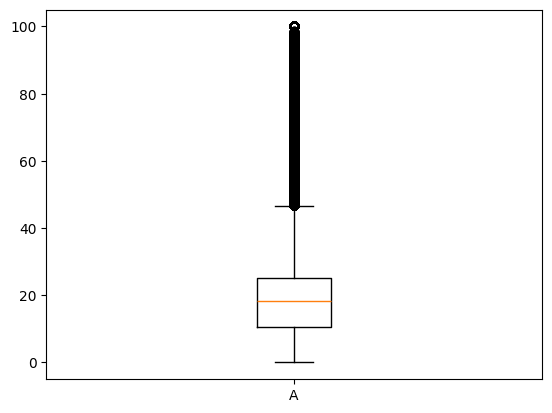

In [15]:
import matplotlib.pyplot as plt

plt.boxplot(flat_list)

plt.gca().xaxis.set_ticklabels(['A']) ; plt.show()

In [ ]:
import seaborn as sns
sns.heatmap(mat, annot=True)

In [32]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.1-cp310-cp310-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.4.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.9.2-cp310-cp310-win_amd64.whl (7.8 MB)
   ---------------------------------------- 0.0/216.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/216.0 kB ? eta -:--:--
   ----------------- ---------------------- 92.2/216.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  215.0/216.0 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 216.0/216.0 kB 1.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached font

# determination du calibre

## Pistes
- après le mot clé cal
- prédéfinir une liste de calibres existants
- avant mm

In [7]:
calibres=df["calibreCanonUn"]
calibres=list(dict.fromkeys(calibres))

In [8]:
df2

,referenceRGA,famille,typeArme,marque,modele,fabricant,paysFabricant,modeFonctionnement,systemeAlimentation,longueurArme,...,typeCanonQuatre,longueurCanonQuatre,armeSemiAutoApparenceArmeAuto,designation_commerciale,classementFrancais,classementEuropeen,prototype,visible,dateCreaRGA,dateMajRGA
calibreCanonUn,,,,,,,,,,,,,,,,,,,,,
10 MM AUTO,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
"10,3 X 60 R",11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
"10,3 X 68 MAG (NON CIP)",3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
"10,4 ORD IT",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"10,4 X 38 R",2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CALIBRE 410/76 (3'') (12MM),1419,1419,1419,1419,1419,1419,1419,1419,1419,1419,...,1419,1419,1419,1419,1419,1419,1419,1419,1419,1419
CALIBRE 8/100,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
CALIBRE 8/82,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [6]:
df2=df.groupby("calibreCanonUn").count()

In [11]:
df2=df2[["referenceRGA"]]

In [16]:
df3=df2.sort_values("referenceRGA",ascending=False)

In [18]:
df3.to_csv('Calibreslistes.csv')